In [1]:
import pandas as pd
import numpy as np

In [3]:
ab = pd.read_csv('Netology_A_B-testing_HW_1.csv',na_values='?')
ab.head()

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium


# Гипотеза 1
Если мы перестанем показывать информацию о надбавке за повышенный спрос для тех, кто едет не из центра, в случае запроса цены на поездку, то конверсия в заказ на шаге показа цены увеличится на 14%, потому что среди данной группы конверсия 82% среди тех, кто не видит отметку о повышенном спросе и 68% среди тех, кто видит пометку.  
**Генеральная совокупность:** Пользователи, совершающие поездки не из центра

In [4]:
no_city_center = ab.loc[(ab['city_center_order'] == 0)]
no_city_center

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
8,8,2020-05-23,931492,20,1,0,0,NaN,0,0,25,iOS,0,economy,NaN,medium
10,10,2020-05-23,464055,20,1,1,1,surge,1,0,59,iOS,0,comfort,3.647097,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101492,101492,2020-05-21,213028,13,1,1,1,no surge,1,0,18,iOS,0,business,7.993689,low
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high
101497,101497,2020-05-23,784442,1,1,1,1,no surge,1,0,40,iOS,0,economy,6.624225,medium
101498,101498,2020-05-20,232993,13,1,1,1,no surge,1,0,52,iOS,0,business,8.825188,low


In [28]:
import random
pd.options.mode.chained_assignment = None
no_city_center['randNumGroup'] = np.random.randint(1,3, size=len(no_city_center))
no_city_center

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm,randNumGroup
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low,2
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low,2
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium,1
8,8,2020-05-23,931492,20,1,0,0,NaN,0,0,25,iOS,0,economy,NaN,medium,1
10,10,2020-05-23,464055,20,1,1,1,surge,1,0,59,iOS,0,comfort,3.647097,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101492,101492,2020-05-21,213028,13,1,1,1,no surge,1,0,18,iOS,0,business,7.993689,low,1
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high,2
101497,101497,2020-05-23,784442,1,1,1,1,no surge,1,0,40,iOS,0,economy,6.624225,medium,1
101498,101498,2020-05-20,232993,13,1,1,1,no surge,1,0,52,iOS,0,business,8.825188,low,1


In [54]:
no_city_center_1 = no_city_center.loc[(no_city_center['randNumGroup'] == 1)]
no_city_center_1

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm,randNumGroup
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium,1
8,8,2020-05-23,931492,20,1,0,0,NaN,0,0,25,iOS,0,economy,NaN,medium,1
10,10,2020-05-23,464055,20,1,1,1,surge,1,0,59,iOS,0,comfort,3.647097,high,1
11,11,2020-05-24,370093,12,1,1,1,no surge,1,0,27,Android,0,economy,4.273224,medium,1
12,12,2020-05-21,811050,4,1,0,0,NaN,0,0,51,Android,0,economy,NaN,medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101483,101483,2020-05-19,740067,21,1,1,1,no surge,1,0,28,iOS,0,economy,8.076814,medium,1
101487,101487,2020-05-24,550292,13,1,1,1,no surge,0,1,40,Android,0,economy,6.475528,medium,1
101492,101492,2020-05-21,213028,13,1,1,1,no surge,1,0,18,iOS,0,business,7.993689,low,1
101497,101497,2020-05-23,784442,1,1,1,1,no surge,1,0,40,iOS,0,economy,6.624225,medium,1


In [55]:
no_city_center_2 = no_city_center.loc[(no_city_center['randNumGroup'] == 2)]
no_city_center_2

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm,randNumGroup
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low,2
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low,2
14,14,2020-05-21,382672,2,1,1,1,no surge,1,0,37,iOS,0,comfort,8.669202,high,2
30,30,2020-05-22,758449,15,1,1,1,no surge,1,0,22,iOS,0,economy,2.683326,low,2
36,36,2020-05-22,580861,23,1,1,1,no surge,1,0,19,Android,0,comfort,2.026410,low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101479,101479,2020-05-21,112013,14,1,1,1,no surge,1,0,22,Android,0,comfort,6.090853,low,2
101488,101488,2020-05-21,811817,7,1,1,0,surge,0,0,38,Android,0,comfort,4.515511,high,2
101489,101489,2020-05-20,969159,22,1,0,0,NaN,0,0,67,Android,0,comfort,NaN,medium,2
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high,2


In [56]:
print (len(no_city_center_1) - len (no_city_center_2))

23


In [64]:
import scipy.stats as stats
#попробуем сравнить группы по возрасту, т.к. у разных возрастов разные паттерны поведения при виде надбавки
t, p_value = stats.ttest_ind(no_city_center_1.age, no_city_center_2.age) #Критерий Стьюдента (t-test)
t, p_value

(-1.1220780326727515, 0.26183546048196876)

In [79]:
stats.ttest_ind(no_city_center_1.age, no_city_center_2.age, equal_var = False)

Ttest_indResult(statistic=-1.1220819908371111, pvalue=0.26183377789876466)

In [80]:
alpha = 0.05
if p_value < alpha:
    print('p-value меньше уровня значимости -- значит гипотезу о том, что выборки различаются, следует отвергнуть')
else: 
    print('p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять') 

p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять


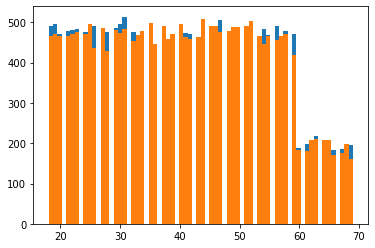

In [81]:
#по возрасту группы значимо отличаются, 
    #нужно, либо поменять определяющую метрику, либо пересортировать группы с учетом возрастов

import matplotlib.pyplot as plt
plt.hist(no_city_center_1.age, bins=70); 
plt.hist(no_city_center_2.age, bins=70);

# Гипотеза 2
Если мы изменим экран отмены поездки для пользователей андроид, в случае попытки отмены уже созданного заказа, то конверсия в завершенные поездки увеличится на 4,2%, потому что конверсия на этом шаге у андроида на 4,2% меньше, чем у айос, попробуем сделать экран максимально похожим на айос, или наоборот, сделаем экран с привычными паттернами именно для андроид.  
**Генеральная совокупность:** Пользователи платформы андроид

In [68]:
Android = ab.loc[(ab['os'] == 'Android')]
Android

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
5,5,2020-05-21,139455,5,1,0,0,NaN,0,0,60,Android,1,comfort,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101489,101489,2020-05-20,969159,22,1,0,0,NaN,0,0,67,Android,0,comfort,NaN,medium
101490,101490,2020-05-20,780673,20,1,1,0,surge,0,0,67,Android,1,comfort,5.439498,medium
101491,101491,2020-05-21,456333,10,1,1,1,no surge,1,0,34,Android,1,business,16.003392,high
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high


In [71]:
Android['randNumGroup'] = np.random.randint(1,3, size=len(Android))
Android

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm,randNumGroup
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high,2
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low,2
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low,1
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium,1
5,5,2020-05-21,139455,5,1,0,0,NaN,0,0,60,Android,1,comfort,NaN,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101489,101489,2020-05-20,969159,22,1,0,0,NaN,0,0,67,Android,0,comfort,NaN,medium,2
101490,101490,2020-05-20,780673,20,1,1,0,surge,0,0,67,Android,1,comfort,5.439498,medium,1
101491,101491,2020-05-21,456333,10,1,1,1,no surge,1,0,34,Android,1,business,16.003392,high,2
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high,1


In [73]:
Android_1 = Android.loc[(Android['randNumGroup'] == 1)]
Android_1

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm,randNumGroup
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low,1
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium,1
5,5,2020-05-21,139455,5,1,0,0,NaN,0,0,60,Android,1,comfort,NaN,low,1
7,7,2020-05-22,682337,2,1,1,1,no surge,1,0,40,Android,1,comfort,9.055344,medium,1
11,11,2020-05-24,370093,12,1,1,1,no surge,1,0,27,Android,0,economy,4.273224,medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101479,101479,2020-05-21,112013,14,1,1,1,no surge,1,0,22,Android,0,comfort,6.090853,low,1
101487,101487,2020-05-24,550292,13,1,1,1,no surge,0,1,40,Android,0,economy,6.475528,medium,1
101490,101490,2020-05-20,780673,20,1,1,0,surge,0,0,67,Android,1,comfort,5.439498,medium,1
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high,1


In [74]:
Android_2 = Android.loc[(Android['randNumGroup'] == 2)]
Android_2

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm,randNumGroup
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high,2
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low,2
9,9,2020-05-23,662775,17,1,1,1,surge,1,0,48,Android,1,comfort,4.828326,medium,2
18,18,2020-05-19,393096,23,1,1,0,surge,0,0,28,Android,1,comfort,2.523357,low,2
23,23,2020-05-18,638064,21,1,0,0,NaN,0,0,58,Android,1,economy,NaN,medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101478,101478,2020-05-22,810447,18,1,1,0,no surge,0,0,23,Android,0,comfort,1.464645,low,2
101485,101485,2020-05-19,427672,16,1,1,1,no surge,1,0,21,Android,1,business,19.971031,low,2
101488,101488,2020-05-21,811817,7,1,1,0,surge,0,0,38,Android,0,comfort,4.515511,high,2
101489,101489,2020-05-20,969159,22,1,0,0,NaN,0,0,67,Android,0,comfort,NaN,medium,2


In [76]:
print (len(Android_1) - len (Android_2))

-104


In [77]:
#попробуем сравнить группы по возрасту, т.к. у разных возрастов может быть разное восприятие интерфейса
t, p_value = stats.ttest_ind(Android_1.age, Android_2.age) #Критерий Стьюдента (t-test)
t, p_value

(-0.5089561045666434, 0.6107849732247602)

In [82]:
stats.ttest_ind(Android_1.age, Android_2.age, equal_var = False)

Ttest_indResult(statistic=-0.5089527746625035, pvalue=0.6107873074332979)

In [83]:
alpha = 0.05
if p_value < alpha:
    print('p-value меньше уровня значимости -- значит гипотезу о том, что выборки различаются, следует отвергнуть')
else: 
    print('p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять') 

p-value больше уровня значимости -- значит гипотезу о том, что выборки различаются, следует принять


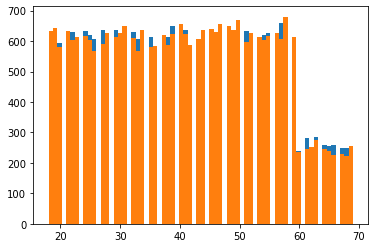

In [85]:
#среди пользователей андроида по возрасту группы также значимо отличаются, 
    #нужно, либо поменять характерную метрику для группы, либо, помимо возраста взять что-то еще 

plt.hist(Android_1.age, bins=70); 
plt.hist(Android_2.age, bins=70);